# Theory and methods

In [7]:
import numpy as np
import pandas as pd
import semopy as sem


## A simple model of skills accumulation

The dynamics of child development has been increasingly a subject of study among researches in a wide range of disciplines. A simple theoretical framework is based on the idea of fixed, discrete set of skills (e.g. cognition, socioemotional, prysical health, nutrition) which evolve over time based on an unknown accumulation process (i.e. techonology). We can easily represent such structure as:

$$\theta_{k,t+1}=f_{k,t}(\theta_{k,t}, I_t, \theta_H, E_{k,t})$$

Where for $k$ different skills ($\theta$), the accumulation process is a function of previous skills, parental investments (I), fixed household characteristics (H) and time-varying enviromental factors (E). Similarly, we can describe the parental decisions regarging child invesments as a function of child characteristics, household constrains and prices (e.g. alternative cost of time) as follows:

$$I_t=g_t(\Theta_t, Z_t, \theta_H, v_t)$$

Where $\Theta_t$ is the vector of skills, $Z$ represents prices for different investments and other household information, while $v$ resumes other time-varying unobserved information. $v$ and $E$ is what we normally refer as shocks, i.e. unexpected events that can alter parental decisions but also the capacity of children to accumulate skills (e.g. natural disasters). 

If we divide the skills between nutritional status and other capacities, we can think about this model graphically as:

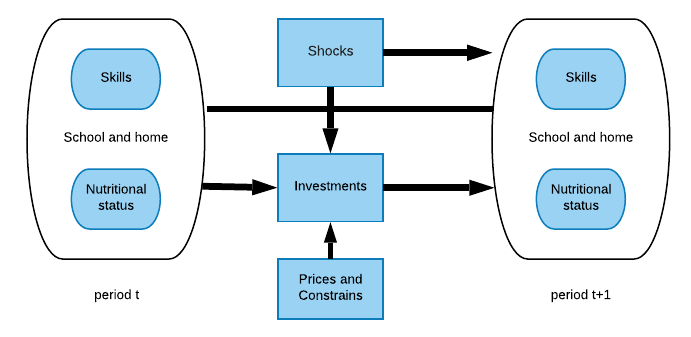

In [3]:
from IPython.display import Image
Image(filename='../assets/images/dag.png')

Ultimately, in onder to characterize, describe and predict skills, we are interested in two key elements. First, is important to measure different skills and parental investments through simple but information-rich indexes, in order to avoid dealing with too many moving pieces. Secondly, given a set of skills available, we would like to describe the evolution of skills across individuals and communities, in order to inform stakeholders as well as target, monitor and evaluate programs. Below we describe both steps.  

## Measuring skills and investments

While measuring children's physical characteristics (e.g. weight and height) is rather straighfoward and, in some cases, quite fast, measuring other aspects of development is rather cumbersome. Comprehensive, structured tests have been designed by specialists in different areas to measure congition, language, socialization and other skills at different ages. Similar tools have been developed to assess parental behavior and investments. Recently, strong attention has been devoted to understand the quality of information within such instruments. In many cases, only a few of the items in each scale are consistently providing useful signals of an underlying measure of skill (or investment), leaving as an open question whether we require complex and time-consuming tools to assess particular aspects of child development.

Here, we took a much more simple approach to measurement, motivated by the availability of administrative data in Chile and the recent experiences in application of latent variable models in social science research. To fix ideas, lets say that we have $j$ different measures (M) for $k$ skills in $t$ periods (there are multiple individuals, which are not indexed in order to facilitate notation). We can construct unidimensional indexes for each skill using this measures given the following dedicated linear system:

$$M^j_{kt} = a^j_{kt} + \lambda^j_{kt}ln \theta^j_t + \eta^j_{kt}$$  
$$E(ln \theta^j_t)= \mu^j_t $$
$$Var(\Theta)= \Omega_{\theta}$$

This measurement system allows to construct measures of skills (or investments) based in the common information across imperfect measured proxies. We can allow for substantial flexibility in the system, but to ilustrate its application, I will keep it simple. Intuitively, estimating this system involves stablishing some relationship with measures and its best linear projection from a single variable. 

In the case of parental investments, the Chilean data contains frequency of parent-child interactions in seven different dimensions (reading, playing, singing) in discrete bins (once per month, twice per month, etc). The result of using this method yields a variable that measures parental investments based on the common driver of such interactions, using the information across all households and over time. As for socioemotional skills, there is a set of variables with parent-reported measures of child's behavior. I concentrate here on three measures that characterize socialization, self-control and communication skills, which I refer as Externalizing Behavior, in the spirit of the Big Five Factor model. While three items seem like too little information, they are in fact sufficient to identify the model (specially given repeated measures for the same invididual over time). While we are concerned that parents then to report child's behavior with bias, there is an easy correction by introducing a random coefficient that varies by children. In the example below I abstract from such matter (and others like deviations from normality) in order to make the presentation as simple as possible.   

In this example I use a simulated dataset that generates a sample that represent 5% of the complete administrative dataset for a given cohort, contained in one region of the country, for visualization purposes. The simulated data mimics the joint distribution of all relevant variables used in the web platform (Dashboard). Construction of latent indexes is done with the __semopy__ library.

In [4]:
mn = pd.read_csv('../data/mn/mn_5p_2017b.csv')

In [8]:
#declare model
from semopy import Model
mod = """ S0e =~ diff7_0 + diff5_0 + diff8_0
          S1e =~ diff7_1 + diff5_1 + diff8_1
          S2e =~ diff7_2 + diff5_2 + diff8_2
          I1e =~ ip1_1 + ip2_1 + ip3_1 + ip4_1 + ip5_1 + ip6_1 + ip7_1
          I1e =~ ip1_2 + ip2_2 + ip3_2 + ip4_2 + ip5_2 + ip6_2 + ip7_2
      """
model = Model(mod)

#load data
model.load_dataset(mn)

#run
from semopy import Optimizer
opt = Optimizer(model)
ojbective_function_value = opt.optimize()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
#results
from semopy import inspect
inspect(opt)